# Projet - Molécules 3D

In [1]:
from ase.io import read
import nglview as nv
from pathlib import Path
from IPython.display import display, Markdown
import random

data_dir = Path("../../data/atoms/train")

random_ids = random.sample(range(1, 1201), 5)

for mol_id in random_ids:
    file_path = data_dir / f"id_{mol_id}.xyz"
    mol_name = file_path.stem
    mol = read(file_path)
    display(Markdown(f"### Molécule : `{mol_name}`"))
    display(nv.show_ase(mol))


/home/gris/miniforge3/lib/python3.10/site-packages/nglview/__init__.py:12: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


### Molécule : `id_344`

NGLWidget()

### Molécule : `id_253`

NGLWidget()

### Molécule : `id_1039`

NGLWidget()

### Molécule : `id_932`

NGLWidget()

### Molécule : `id_425`

NGLWidget()

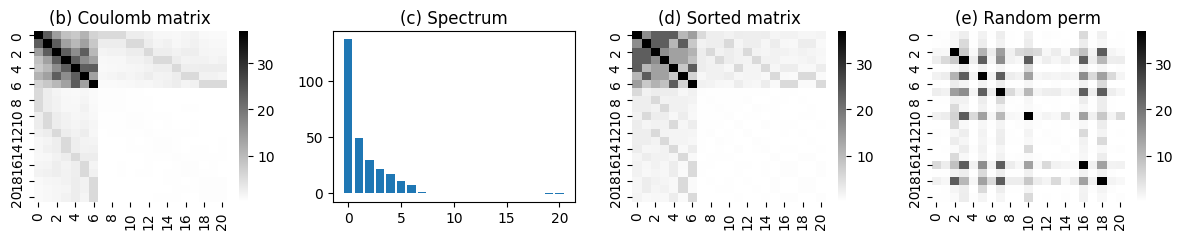

In [20]:
from ase.io import read
from ase.data import atomic_numbers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mol = read("../../data/atoms/train/id_105.xyz")

Z = mol.get_atomic_numbers()
R = mol.get_positions()

def coulomb_matrix(Z, R):
    n = len(Z)
    M = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i == j:
                M[i, j] = 0.5 * Z[i] ** 2.4
            else:
                M[i, j] = Z[i] * Z[j] / np.linalg.norm(R[i] - R[j])
    return M

C = coulomb_matrix(Z, R)

# (b) Matrice brute
plt.figure(figsize=(12, 2.5))
plt.subplot(1, 4, 1)
sns.heatmap(C, cmap='binary')
plt.title("(b) Coulomb matrix")

# (c) Spectre
eigvals = np.linalg.eigvalsh(C)
plt.subplot(1, 4, 2)
plt.bar(range(len(eigvals)), sorted(eigvals, reverse=True))
plt.title("(c) Spectrum")

# (d) Matrice triée par norme de ligne
row_norms = np.linalg.norm(C, axis=1)
sorted_idx = np.argsort(-row_norms)  # tri décroissant
C_sorted = C[sorted_idx][:, sorted_idx]
plt.subplot(1, 4, 3)
sns.heatmap(C_sorted, cmap='binary')
plt.title("(d) Sorted matrix")

# (e) Versions aléatoires
plt.subplot(1, 4, 4)
perm = np.random.permutation(len(Z))
C_perm = C[perm][:, perm]
sns.heatmap(C_perm, cmap='binary')
plt.title("(e) Random perm")

plt.tight_layout()
plt.show()


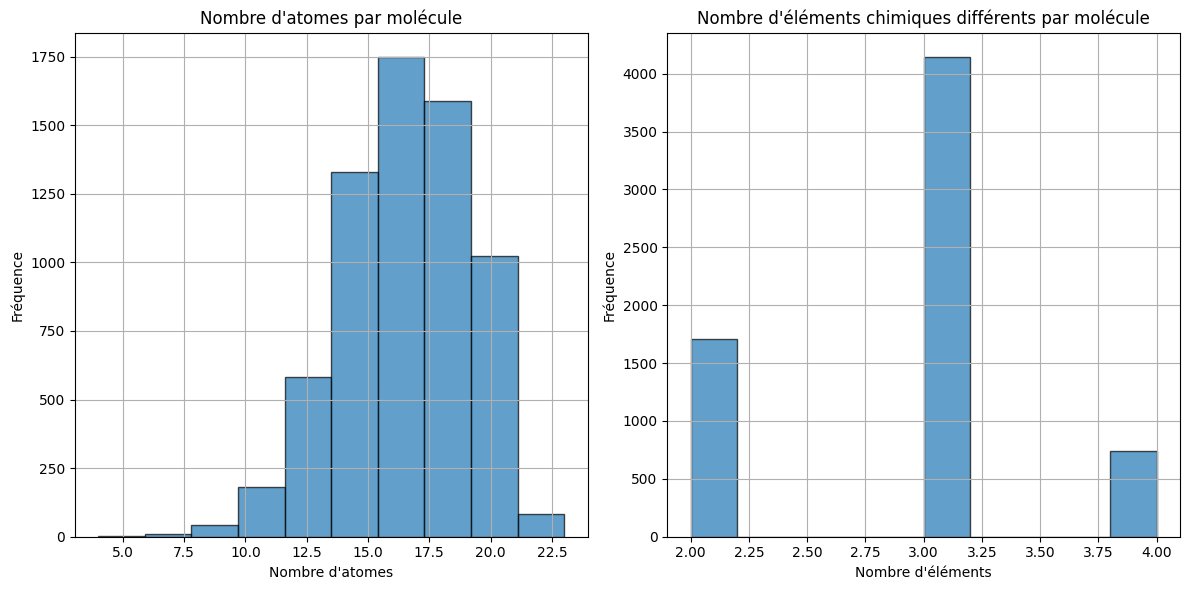

In [22]:
import os
import matplotlib.pyplot as plt
from ase.io import read
from collections import Counter

def load_molecules_from_directory(directory):
    molecules = []
    element_counts = []  
    for filename in os.listdir(directory):
        if filename.endswith(".xyz"):
            molecule = read(os.path.join(directory, filename))
            atom_count = len(molecule)
            molecules.append(atom_count)
            
            elements = [atom.symbol for atom in molecule]
            unique_elements = len(set(elements))
            element_counts.append(unique_elements)
    
    return molecules, element_counts

def plot_histogram(data, title, xlabel, ylabel, bins=None):
    plt.hist(data, bins=bins, edgecolor='black', alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)

atom_counts, element_counts = load_molecules_from_directory(data_dir)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  
plot_histogram(atom_counts, 'Nombre d\'atomes par molécule', 'Nombre d\'atomes', 'Fréquence')
plt.subplot(1, 2, 2)  
plot_histogram(element_counts, 'Nombre d\'éléments chimiques différents par molécule', 'Nombre d\'éléments', 'Fréquence')

plt.tight_layout()  
plt.show()


## Etude des énergies

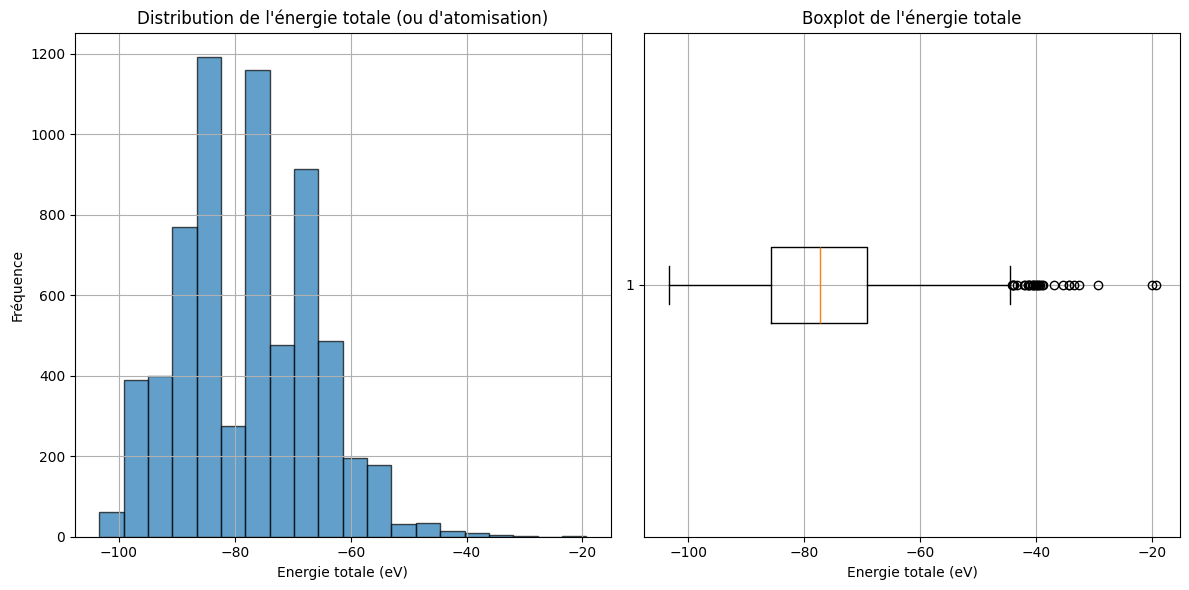

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_energy_distribution(df):
    plt.figure(figsize=(12, 6))

    # Histogramme
    plt.subplot(1, 2, 1)  
    plt.hist(df['energy'], bins=20, edgecolor='black', alpha=0.7)
    plt.title('Distribution de l\'énergie totale (ou d\'atomisation)')
    plt.xlabel('Energie totale (eV)')
    plt.ylabel('Fréquence')
    plt.grid(True)

    # Boxplot de l'énergie totale
    plt.subplot(1, 2, 2)  
    plt.boxplot(df['energy'], vert=False)
    plt.title('Boxplot de l\'énergie totale')
    plt.xlabel('Energie totale (eV)')
    plt.grid(True)

    plt.tight_layout() 
    plt.show()

csv_file_path = '../../data/energies/train.csv'  

df = pd.read_csv(csv_file_path)
plot_energy_distribution(df)
